# Workshop: Scope of variables

by [Luciano Gabbanelli](https://www.linkedin.com/in/luciano-gabbanelli)

<img style="margin-right: 50px;" width=80 src="https://media.giphy.com/media/KAq5w47R9rmTuvWOWa/giphy.gif">

<img width=80 src="../../logos/Assembler.png">

***

## The `id()` function

The `id()` function returns a unique id (unique integer -identity-) for the specified object.

All objects in Python has its own unique id.

The id is assigned to the object when it is created.

The id is the object's memory address, and will be different for each time you run the program. (except for some object that has a constant unique id, like integers from -5 to 256, known as integer interning, or string interning).

> **Syntax**: `id(object)`
>
> `object` can be a class, variable, list, tuple, set, etc.

Let us start by defining some lists to begin our discussion:

In [1]:
list_1 = [1,2,3]
list_2 = [1,2,3]
list_9 = [3,2,1]

In [4]:
print(id(list_1),id(list_2), id(list_9), sep='\n')

2260871265920
2260875430400
2260871263424


In [13]:
print(list_1 == list_9[::-1])
print(list_1 == list_2)
print(list_1 is list_2)

True
True
False


The last statement is **False** because the memory address is not the same!

**They are not the same object!!**

<p align="center">

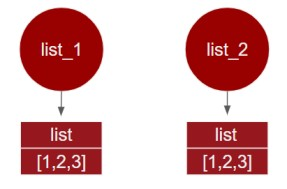

</p>

Now, let us define a new list equal to `list_1`

In [17]:
list_3 = list_1

In [15]:
print(id(list_3)==id(list_1))

True


Clearly, both lists have the same content. Let us see what happens if we include new element into the list:

In [16]:
list_3.append(4)

In [13]:
print(list_3)

[1, 2, 3, 4]


In [14]:
print(list_1)

[1, 2, 3, 4]


In [15]:
print(id(list_1))
print(id(list_3))
print(id(list_2))

3004434848832
3004434848832
3004434833984


In [16]:
list_1 is list_3

True

The last statement is **True** because the memory address is actally the same! 

**They are actually the same object!!**

<p align="center">

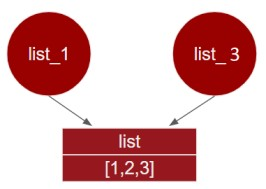

</p>

In [ ]:
### Integer interning

In [8]:
a = 5
b = 5
c = 257
d = 257

In [12]:
print(f'''a has the same id() as b? {a is b}
c has the same id() than d? {c is d}''')

a has the same id() as b? True
c has the same id() than d? False


## Scope of a variable

The region that a variable is recognized.

A variable is only available from inside the region it is created.

A global and locally scoped versions of a variable can be created.

### Local variables

In [29]:
def display_name():
    name = 'Winona Ryder' # local scope (available only indise this function)
    print(f'How are you, {name}?')

In [21]:
display_name()

How are you, Winona Ryder?


`name` is only available within the function where it was created (local scope).

**I cannot access local variables from outside the funcition!**

In [22]:
name

NameError: name 'name' is not defined

### Global variables

Global variables are declared outside functions but within the module that you are working with.

In [23]:
name = 'Lucho'   # global scope (available inside and outside functions)

In [24]:
print(name)

Lucho


Global variables are available inside and outside from any function:

In [30]:
def display_name_global():
    print(f'My name is {name}!')

In [31]:
display_name_global()

My name is Lucho!


### Global and local variables toghether

It is entirely possible to have both, a global and a local version of the same named variable. 

Let us say, a global and a local variables called `name`.

The global variable is already defined and we can call it:

In [32]:
name

'Lucho'

We can have both a global and a local version of the same named variable:

In [33]:
display_name()

How are you, Winona Ryder?


Remember that the function with a local variable called `name` has been already defined as well as a global variable called `name`.

> ``` 
> name = 'Lucho'   
> # global scope (available inside and outside functions)
> 
>
> def display_name():
>
>       name = 'Winona Ryder'
>
>       # local scope (available only indise this function)
>
>       print(f'How are you, {name}?')
>```

If you use both, your code will always use the local version of that variable inside the function if available.

In [34]:
print(f"name's identifierier: {id(name)}")

name's identifierier: 3004414302576


In [35]:
def my_name():
    name = 'Winona Ryder'
    print(f'How are you, {name}? Your variable identifier is {id(name)}')

In [36]:
my_name()

How are you, Winona Ryder? Your variable identifier is 3004450878832


**If there is no local variable, Python will use the global version istead.**

<img align="left" width="300"  src="Images/Scope.png">

&nbsp; Python uses  the LEGB rule:

> ```
>          L = Local
> 
>          E = Enclosing
>
>          G = Global
>
>          B = Built-in
> ```  

## Watch out!

In [1]:
hola = 'Una cosa'
def my_sum(my_list,*integers):
    result = 0
    hola = 'Otra cosa'     # local scope (available only indise this function)
    for item in my_list:
        result += item
        
    for x in integers:
        result += x
    
    print ('Local variable:', hola,id(hola))
    return result, hola

In [2]:
my_sum([1,2,3], 4,5)

Local variable: Otra cosa 2214369888560


(15, 'Otra cosa')

In [3]:
result

NameError: name 'result' is not defined

In [4]:
print('Global variable:', hola, '-> with identifier:', id(hola))
print()

result, hola = my_sum([1,2,3], 4)

Global variable: Una cosa -> with identifier: 2214369641328

Local variable: Otra cosa 2214369888560
Global variable: Otra cosa -> with identifier: 2214369888560



In [5]:
print("I have 'globalized' my local variable:", hola, '-> with identifier:', id(hola))

I have 'globalized' my local variable: Otra cosa -> with identifier: 2214369888560


## Enclosing scopes

Enclosing (or nonlocal) scope is a special scope that only exists for nested functions. If the local scope is an inner or nested function, then the enclosing scope is the scope of the outer or enclosing function. This scope contains the names that you define in the enclosing function.

In [15]:
z='!'
def myfunc():
    x = 'This variable is defined outside the most inner function, '
    
    def myinnerfunc():
        y = 'but it is availebale in the most inner function'
        print(x+y+z)
    
    myinnerfunc()

In [16]:
myfunc()

In [10]:
z

'!'

Clearly, neither `x` nor `y` is available outside of either function.

* I cannot use `y` outside `myinnerfunc()`.


* I cannot use `x` outside `myfunc()`, but I can use `x` inside `myfunc()` or `myinnerfunc()`.

<br>

<h1><center>
    <span style="color:blue"> Unless I use the global keyword!!! </span>
    </center></h1>

## The Global Keyword

The `global` keyword makes the variable global.

In [17]:
def myfunc():
    global x
    x = 'This variable is defined outside the most inner function, '
    
    def myinnerfunc():
        global y
        y = 'but it is availebale in the most inner function.'
        print(x+y)
    
    myinnerfunc()

In [18]:
myfunc()

This variable is defined outside the most inner function, but it is availebale in the most inner function.


In [19]:
print(x+y+ '\n\nIf I use the global keyword, now both variables are available outside the functions.')

This variable is defined outside the most inner function, but it is availebale in the most inner function.

If I use the global keyword, now both variables are available outside the functions.


###  Other uses

Also, use the `global` keyword if you want to make a change to a global variable inside a function.

In [20]:
x = 300
print(x, '->', id(x))

x = 3
print(x, '->', id(x))

def myfunc():
    global x
    x = 200
    print(x, '->', id(x))

300 -> 2214398546320
3 -> 2214282488176


In [21]:
myfunc()

print(x, '->', id(x))

200 -> 2214282683024
200 -> 2214282683024


[Check this article!](https://favtutor.com/blogs/nonlocal-python#:~:text=The%20main%20difference%20is%20that,scope%20that%20is%20not%20global.)